## Table of contents

### 01. Import Data and Libraries

### 02. Creating a spending flag and visualizationas

### 03. Creating a product range and visualizations

### 04. Creating frequent customer flag and visualizations

### 05. Creating stack bar charts

### 06. Income level distribution

### 07. Income level and age group heatmap

### 01. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [3]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_regions_final.pkl'))

In [4]:
# Checking the output
ords_prods.shape

(32404859, 35)

### 02. Creating a spending flag and visualizationas

In [5]:
#Checking the dataframe
pd.options.display.max_columns = None
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South


In [6]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float16 
 7   add_to_cart_order              float16 
 8   reordered                      float16 
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float16 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [7]:
# creating a spending flag High and Low spender
ords_prods['spending_flag'] = ords_prods['prices'].apply(lambda x: 'low spender' if x<8 else 'high spender')

In [8]:
#checking the output
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,spending_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender


In [9]:
#Checking spending flag
ords_prods['spending_flag'].value_counts(dropna=False)

low spender     17462292
high spender    14942567
Name: spending_flag, dtype: int64

In [10]:
# Creating a crosstab
crosstab_day_spending = pd.crosstab(ords_prods['order_day_of_week'], ords_prods['spending_flag'], dropna = False )

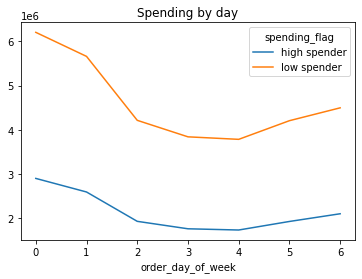

In [11]:
#Visualization spending by day
crosstab_day_spending = crosstab_day_spending.plot(kind = 'line', stacked = True, title = 'Spending by day')

In [12]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f2_2_high_low_spender.png'))

In [13]:
# Creating a crosstab loyal customers and spending flag 
crosstab_loy_spend = pd.crosstab(ords_prods['loyalty_flag'], ords_prods['spending_flag'], dropna = False )

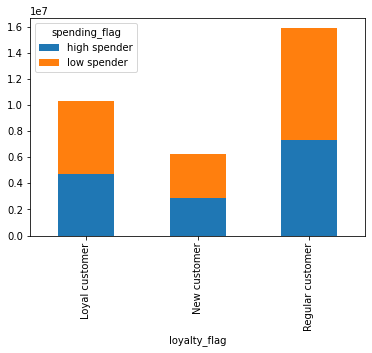

In [14]:
# #Visualization 
crosstab_loy_spend = crosstab_loy_spend.plot(kind = 'bar', stacked = True)

In [15]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f6_1_loyal_high_low_spender.png'))

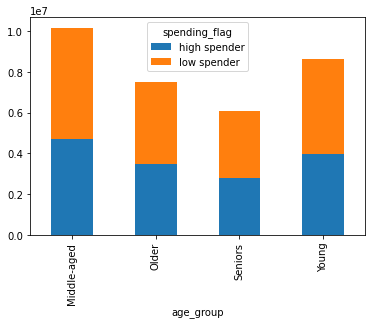

In [16]:
#creating a crosstab spending flag and age group
crosstab_age_spend = pd.crosstab(ords_prods['age_group'], ords_prods['spending_flag'], dropna = False )
crosstab_age_spend = crosstab_age_spend.plot(kind = 'bar', stacked = True)

In [17]:
#Exporting the visualization
crosstab_day_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f8_1_agegroup_high_low_spender.png'))

### 03. Creating a product range and visualizations

In [18]:
# Creating product price range categories
ords_prods.loc[ords_prods['prices'] > 15, 'price_range'] = 'High-range product'
ords_prods.loc[(ords_prods['prices'] <= 15) & (ords_prods['prices'] > 10), 'price_range'] = 'Mid-high range' 
ords_prods.loc[(ords_prods['prices'] <= 10) & (ords_prods['prices'] > 5), 'price_range'] = 'Mid-low range' 
ords_prods.loc[ords_prods['prices'] <= 5, 'price_range'] = 'Low range product'

In [19]:
# Checking the output
ords_prods['price_range'].value_counts(dropna=False)

Mid-low range         11762458
Low range product     10126321
Mid-high range        10098402
High-range product      412551
NaN                       5127
Name: price_range, dtype: int64

In [20]:
#checking the output
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,spending_flag,price_range
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range


In [21]:
# Checking the output
ords_prods['price_range'].value_counts(dropna=False)

Mid-low range         11762458
Low range product     10126321
Mid-high range        10098402
High-range product      412551
NaN                       5127
Name: price_range, dtype: int64

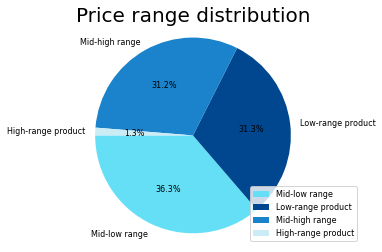

In [22]:
#pie chart for price range distribution
labels = 'Mid-low range', 'Low-range product', 'Mid-high range', 'High-range product'
sizes = ords_prods['price_range'].value_counts()
colors = ['#65DFF6','#00478F','#1A83CC', '#CBEBF5']
textprops = {"fontsize":8}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', startangle=180, textprops=textprops)
ax.axis('equal')
ax.set_title('Price range distribution', fontsize=20)

plt.legend(loc="lower right", fontsize=8)
plt.show()

In [23]:
# exporting price range pie chart
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f3_1_price_pie.png'))

### 04. Creating frequent customer flag and visualizations

In [24]:
# Derriving a column with frequency customer flag
ords_prods.loc[ords_prods['median_days_since_prior_order'] > 20, 'order_frequency_flag'] = 'Non-frequent customer'
ords_prods.loc[(ords_prods['median_days_since_prior_order'] > 10) & (ords_prods['median_days_since_prior_order'] <= 20), 'order_frequency_flag'] = 'Recurring customer'
ords_prods.loc[ords_prods['median_days_since_prior_order'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

In [25]:
# Checking the output
ords_prods['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Recurring customer        7208564
Non-frequent customer     3636437
NaN                             5
Name: order_frequency_flag, dtype: int64

In [26]:
#creating crosstab frequency flag and region
crosstab_freq_spend = pd.crosstab(ords_prods['region'], ords_prods['order_frequency_flag'], dropna = False )

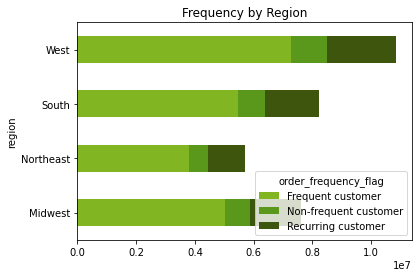

In [27]:
# visualization
crosstab_freq_spend = crosstab_freq_spend.plot(kind = 'barh', stacked = True, color = ['#81B622','#59981A','#3D550C'], title = 'Frequency by Region')

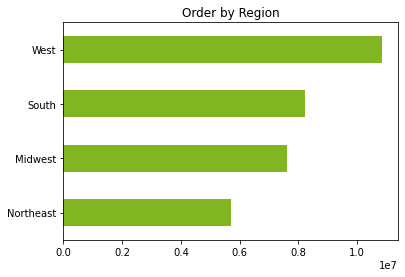

In [29]:
order_by_region = ords_prods['region'].value_counts().sort_values().plot.barh(color = '#81B622', title = 'Order by Region')

In [30]:
#exporting the bar chart
crosstab_freq_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f7_2_region_frequency.png'))
order_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f7_1_region_order.png'))

### 05. Creating stack bar charts

In [31]:
#100% stacked bar chart for days since prior order by loyalty flag

#creating crosstab for days since prior order and loyalty flag

days_loyalty = pd.crosstab(index=ords_prods['days_since_prior_order'], columns=ords_prods['loyalty_flag'], normalize="index")

#creating cross tab to display labels

days_loyalty_labels = pd.crosstab(index=ords_prods['days_since_prior_order'],columns=ords_prods['loyalty_flag'])

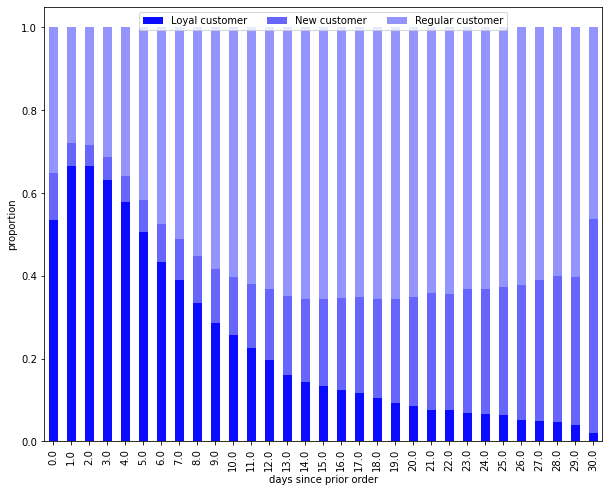

In [32]:
#plotting chart
days_loyalty_dist=days_loyalty.plot(kind='bar', 
                        stacked=True, 
                        color=['#0B0BFF','#6666FF','#9494FF'], 
                        figsize=(10,8))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("days since prior order")


plt.show()

In [33]:
#100% stacked bar chart for income level for each profile

#creating crosstab for income level and profile

profile_income = pd.crosstab(index=ords_prods['profile'], columns=ords_prods['income_level'], normalize="index")

#creating cross tab to display labels

profile_income_labels = pd.crosstab(index=ords_prods['profile'],columns=ords_prods['income_level'])

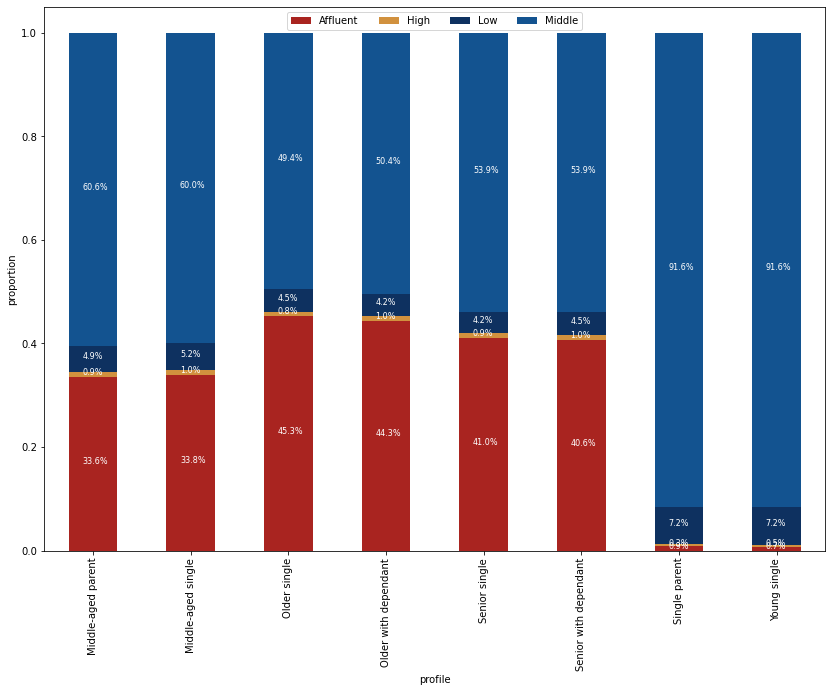

In [34]:
#plotting chart
profile_income_dist=profile_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("profile")


for n, y in enumerate([*profile_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(profile_income.loc[y],
                                         profile_income_labels.loc[y],
                                          profile_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [35]:
#100% stacked bar chart for income level by age group

#creating crosstab for income level and age group

age_income = pd.crosstab(index=ords_prods['age_group'], columns=ords_prods['income_level'], normalize="index")

#creating cross tab to display labels

age_income_labels = pd.crosstab(index=ords_prods['age_group'],columns=ords_prods['income_level'])

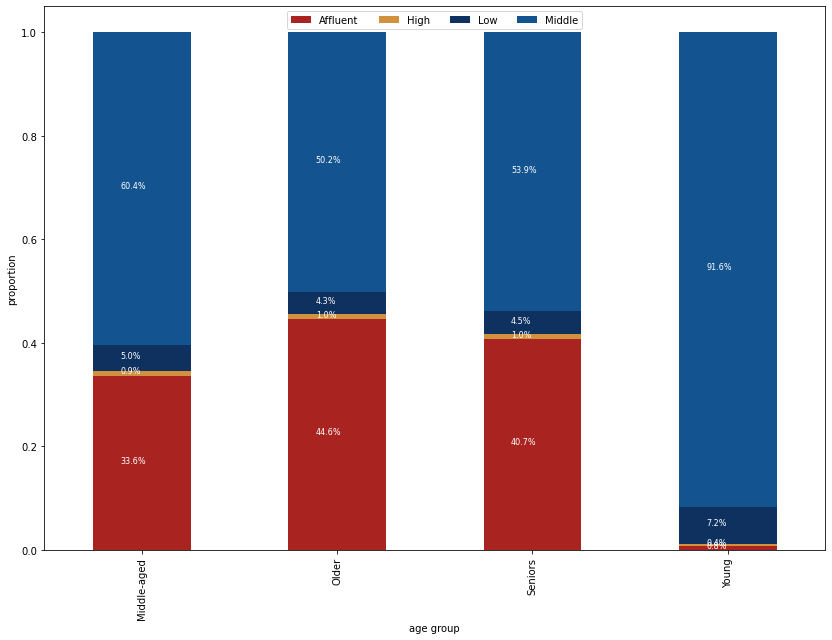

In [36]:
#plotting chart
age_income_dist=age_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("age group")


for n, y in enumerate([*age_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_income.loc[y],
                                         age_income_labels.loc[y],
                                          age_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [37]:
#100% stacked bar chart for income level by marital status

#creating crosstab for income level and marital status

marital_income = pd.crosstab(index=ords_prods['marital_status'], columns=ords_prods['income_level'], normalize="index")

#creating cross tab to display labels

marital_income_labels = pd.crosstab(index=ords_prods['marital_status'],columns=ords_prods['income_level'])

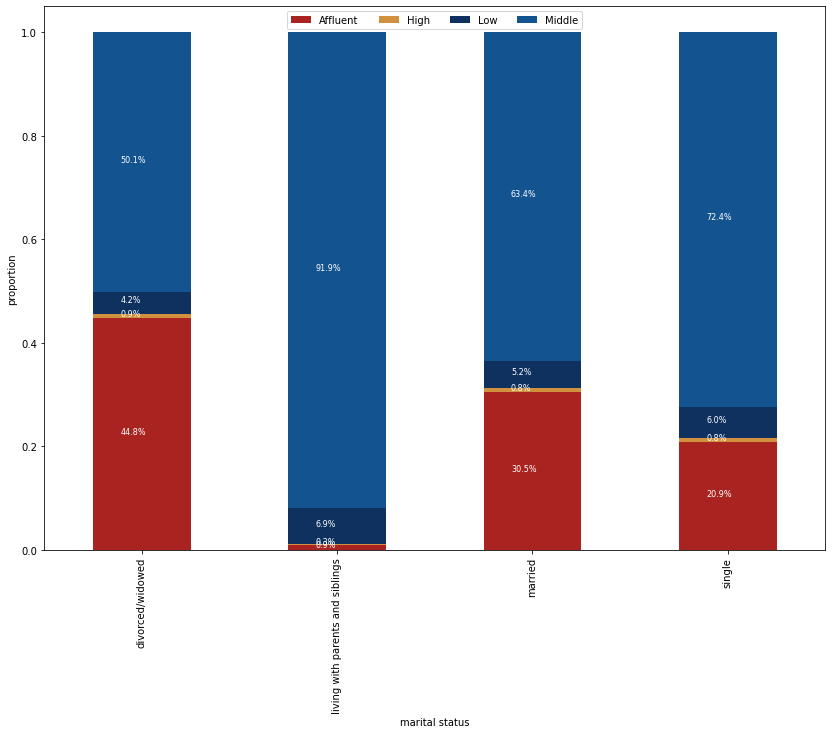

In [38]:
#plotting chart
marital_income_dist=marital_income.plot(kind='bar', 
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(14,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("marital status")


for n, y in enumerate([*marital_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_income.loc[y],
                                         marital_income_labels.loc[y],
                                          marital_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,            
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=8)

plt.show()

In [39]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [40]:
#creating data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [41]:
# mapping  department names to department id in dataframe
ords_prods['department'] = ords_prods['department_id'].map(data_dict)
ords_prods.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level,profile,region,spending_flag,price_range,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle,Single parent,South,high spender,Mid-low range,beverages


In [42]:
#100% stacked bar chart for income level by department

#creating crosstab for income level and department

dep_income = pd.crosstab(index=ords_prods['department'], columns=ords_prods['income_level'], normalize="index")

#creating cross tab to display labels

dep_income_labels = pd.crosstab(index=ords_prods['department'],columns=ords_prods['income_level'])

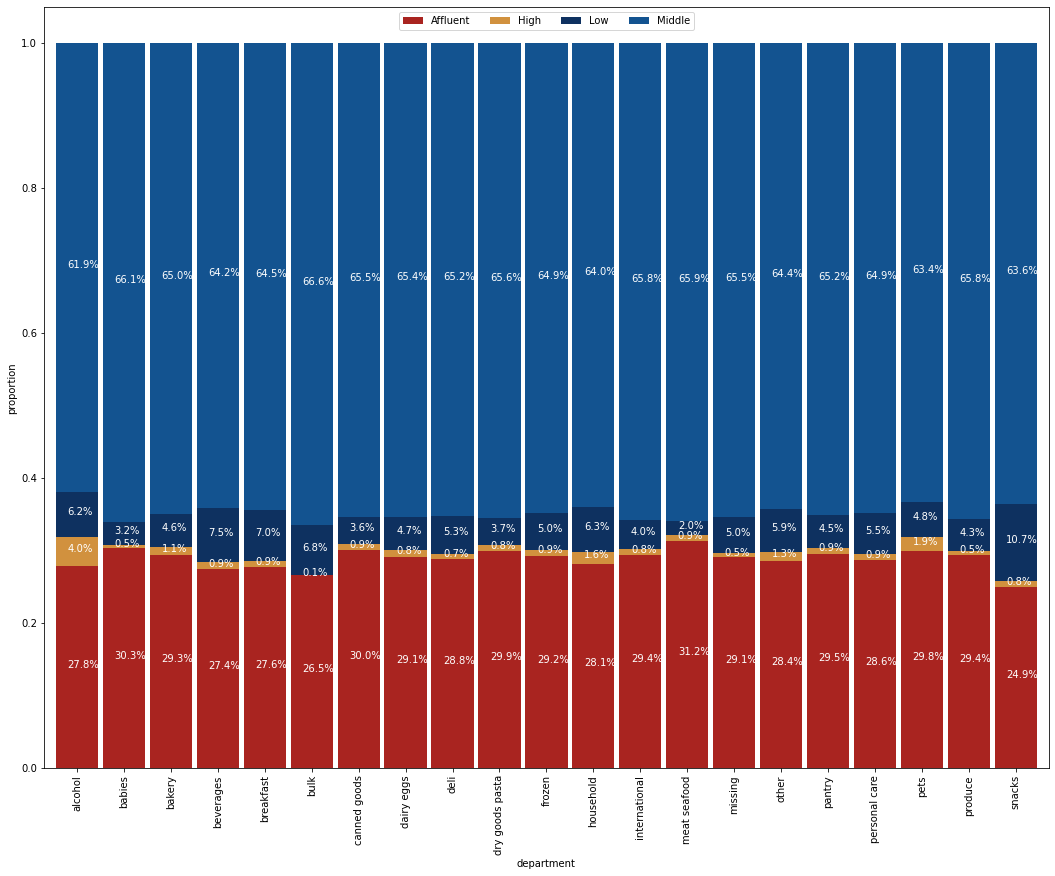

In [43]:
#plotting chart
dep_income_dist=dep_income.plot(kind='bar', 
                                width=(0.9),
                        stacked=True, 
                        color=['#A92420', '#D1913E', '#0E3160','#135390'], 
                        figsize=(18,14))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("department")


for n, y in enumerate([*dep_income_labels.index.values]):
    for (proportion, count, x_loc) in zip(dep_income.loc[y],
                                         dep_income_labels.loc[y],
                                          dep_income.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.2,            
                 s=f'{np.round(proportion * 100,1)}%', 
                 color="white",
                 fontsize=10)

plt.show()

### 06. Income level distribution

In [45]:
# Dictribution of income level
ords_prods['income_level'].value_counts(dropna=False)

Middle      21106291
Affluent     9312927
Low          1727198
High          258443
Name: income_level, dtype: int64

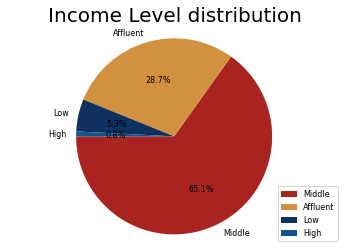

In [47]:
#pie chart for income level distribution
labels = 'Middle', 'Affluent', 'Low', 'High'
sizes = ords_prods['income_level'].value_counts()
colors = ['#A92420', '#D1913E', '#0E3160','#135390']
textprops = {"fontsize":8}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', startangle=180, textprops=textprops)
ax.axis('equal')
ax.set_title('Income Level distribution', fontsize=20)

plt.legend(loc="lower right", fontsize=8)
plt.show()

In [48]:
#exporting the bar chart
days_loyalty_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f5_2_days_loyalty_stacked.png'))
profile_income_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f9_4_profile_income_stacked.png'))
age_income_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f9_3_age_income_stacked.png'))
marital_income_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f8_2_marital_income_stacked.png'))
dep_income_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'f10_2_department_income_stacked.png'))
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_level_distrib.png'))

### 07. Income level and age group heatmap

In [49]:
# creating crosstab to display day_since_prior_order and loyal customers
crosstab_income_age = pd.crosstab(ords_prods['income_level'], ords_prods['age_group'], dropna = False )
crosstab_income_age

age_group,Middle-aged,Older,Seniors,Young
income_level,,,,
Affluent,3420483,3347777,2475312,69355
High,95198,74413,57934,30898
Low,508598,322567,271085,624948
Middle,6142001,3769233,3274313,7920744


In [50]:
correctOrder_columns = ['Young', 'Middle-aged', 'Older', 'Seniors']
# re-arrange the columns
crosstab_income_age = crosstab_income_age [correctOrder_columns]

correctOrder_rows = ['High', 'Affluent', 'Middle', 'Low']
# re-arrange the rows
crosstab_income_age = crosstab_income_age.reindex(correctOrder_rows)

#result
crosstab_income_age

age_group,Young,Middle-aged,Older,Seniors
income_level,,,,
High,30898,95198,74413,57934
Affluent,69355,3420483,3347777,2475312
Middle,7920744,6142001,3769233,3274313
Low,624948,508598,322567,271085


<AxesSubplot:xlabel='age_group', ylabel='income_level'>

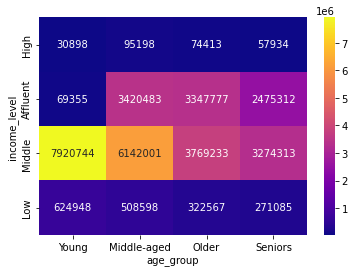

In [51]:
#creating a heatmap
sns.heatmap(crosstab_income_age, annot=True, cmap = 'plasma', fmt='d')